In [58]:
import torch
import torch.nn as nn
from EXTD_cpu import build_extd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image
import cv2
%matplotlib inline

In [2]:
PATH = "./weights/extd_head_180000.pth"
device = torch.device('cpu')
model = build_extd("test")
model.load_state_dict(torch.load(PATH, map_location=device))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

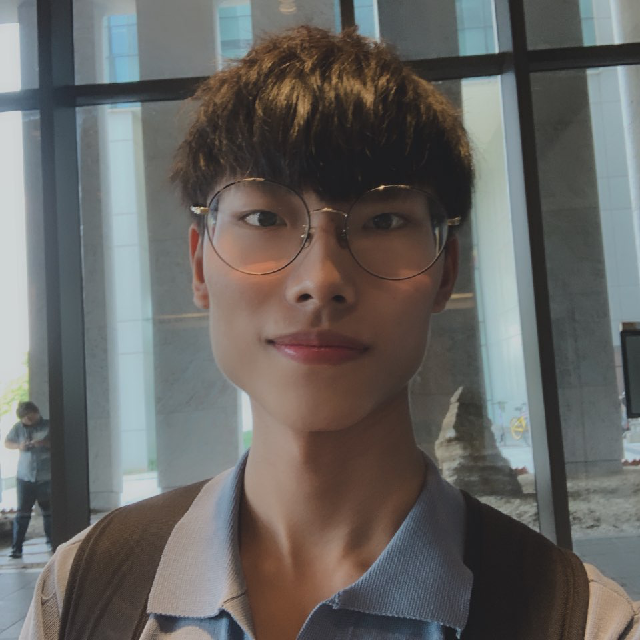

In [100]:
im = Image.open('./img/me0.jpg')
im = im.resize((640, 640))
im

In [101]:
import numpy as np
im = np.asarray(im)
img = np.moveaxis(im, -1, 0)
img = torch.tensor(img).view(-1,3,640,640).float()/255.
img.size()

torch.Size([1, 3, 640, 640])

In [102]:
model,x = model.cpu(), img.cpu()
import time
start = time.time()
out = model(x)
end = time.time()
print(end-start)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


6.18205189704895


In [103]:
print(out.size())
out = out.view(-1,5)
print(" to -> ",out.size())

torch.Size([1, 2, 750, 5])
 to ->  torch.Size([1500, 5])


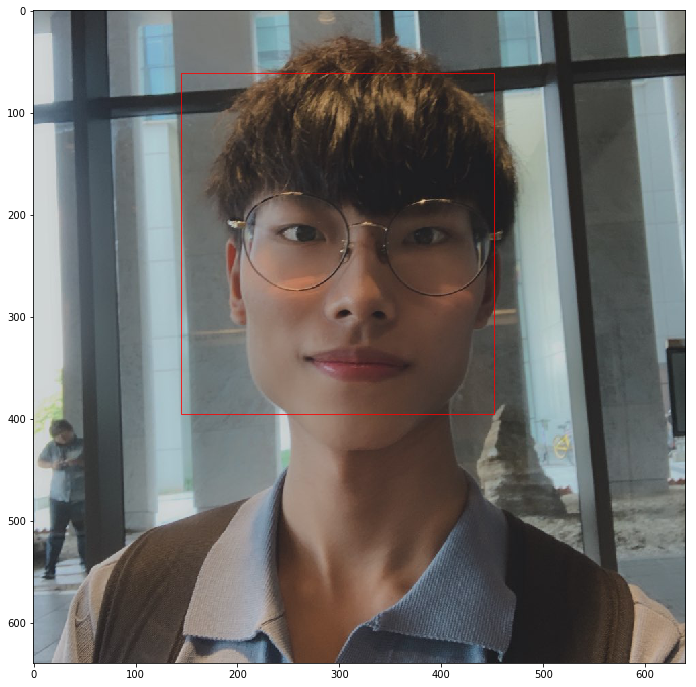

In [119]:
threshold = 0.93
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1)

ax.imshow(im)

for bbox in out:
    if(bbox[0] > threshold):
        bbox = bbox[1:]*640
        xmin, ymin, dx, dy = bbox[0],bbox[1],bbox[2]-bbox[0],bbox[3]-bbox[1]
        rect = patches.Rectangle((xmin,ymin),dx,dy,linewidth=0.8,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
plt.show()
